In [6]:
import sys
sys.path.append('./psquidpython')

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline

In [7]:
import psquidreaders as psr
PSSR = psr.PSquidSweepReader
PSDR = psr.PSquidDataReader
PSRDR = psr.PSquidRawDataReader

/usr/local/lib/python2.7/site-packages/pytz/__init__.py:35: UserWarning: Module argparse was already imported from /usr/local/Cellar/python/2.7.3/Frameworks/Python.framework/Versions/2.7/lib/python2.7/argparse.pyc, but /usr/local/lib/python2.7/site-packages is being added to sys.path
  from pkg_resources import resource_stream


# Cal Resistors

In [8]:
pssr = PSSR('20140311_Ch1-I-V-S1-locked_high-bandwidth_entering-transition-.5-V-bias.txt')
data = pssr.init_data()

IOError: [Errno 2] No such file or directory: '20140311_Ch1-I-V-S1-locked_high-bandwidth_entering-transition-.5-V-bias.txt'

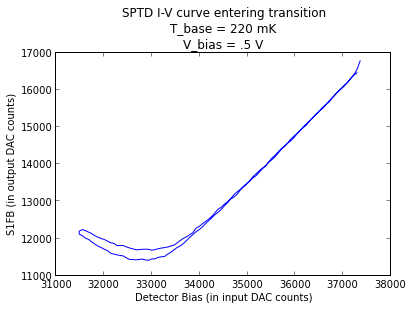

In [16]:
plot(data['swept'], data['locked'])
xlabel('Detector Bias (in input DAC counts)')
ylabel('S1FB (in output DAC counts)')
title('SPTD I-V curve entering transition\nT_base = 220 mK\nV_bias = .5 V')

slope = 1.36528217793, offset = 0.157395526767


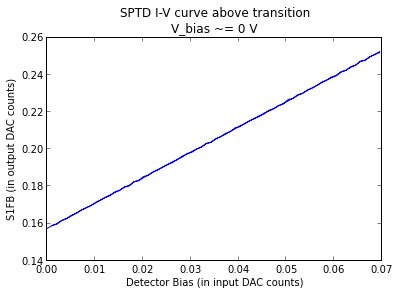

In [32]:
pssr2 = PSSR('20140311_Ch1-I-V_S1-locked_high-bandwidth_normal-state.txt')
data2 = pssr2.init_data()
plot(data2['swept']/65535., data2['locked']/65535.)
xlabel('Detector Bias (in input DAC counts)')
ylabel('S1FB (in output DAC counts)')
title('SPTD I-V curve above transition\nV_bias ~= 0 V')
m, b = polyfit(data2['swept']/65535., data2['locked']/65535., 1)
print "slope = {0}, offset = {1}".format(m, b)

slope = 2.71829223633, offset = 0.215600132942


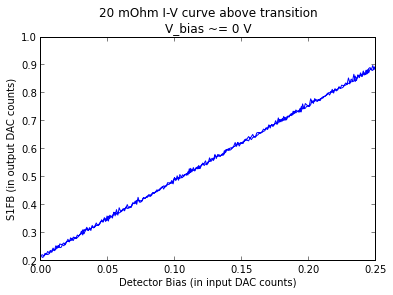

In [30]:
pssr3 = PSSR('20140311_Ch7-I-V_S1-locked_high-bandwidth.txt')
data3 = pssr3.init_data()
plot(data3['swept']/65535., data3['locked']/65535.)
xlabel('Detector Bias (in input DAC counts)')
ylabel('S1FB (in output DAC counts)')
title('20 mOhm I-V curve above transition\nV_bias ~= 0 V')
m20, b20 = polyfit(data3['swept']/65535., data3['locked']/65535., 1)
print "slope = {0}, offset = {1}".format(m20, b20)

slope = d(V_FB)/d(V_DETB) = 1.69248795509, offset = 0.218515843153


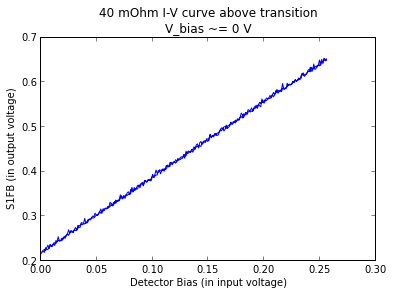

In [40]:
pssr4 = PSSR('20140311_Ch6-I-V_S1-locked_high-bandwidth.txt')
data4 = pssr4.init_data()
plot(data4['swept']*1.024/65535., data4['locked']*1.024/65535.)
xlabel('Detector Bias (in input voltage)')
ylabel('S1FB (in output voltage)')
title('40 mOhm I-V curve above transition\nV_bias ~= 0 V')
m40, b40 = polyfit(data4['swept']*1.024/65535., data4['locked']*1.024/65535., 1)
print "slope = d(V_FB)/d(V_DETB) = {0}, offset = {1}".format(m40, b40)

In [42]:
R_40mOhm = 40.e-3  # 40 mOhms
R_20mOhm = 20.e-3  # 20 mOhms
R_LDET = 200.  # 200 Ohms
R_LFB = 1.e3  # 1 kOhm
M = 8.5   # unitless, M = I_FB/I_TES
Rsh_20 = R_20mOhm*(R_LDET/(M*R_LFB))*m20
Rsh_40 = R_40mOhm*(R_LDET/(M*R_LFB))*m40
print "R_sh_20 = {0}".format(Rsh_20)
print "R_sh_40 = {0}".format(Rsh_40)

R_sh_20 = 0.00127919634651
R_sh_40 = 0.00159292984009


In [51]:
newdata = data['swept'].reshape((1, 1, -1))
newdata.shape

(1, 1, 179)

In [67]:
len(data4)

133

In [61]:
pssr4 = PSSR('20140312_Ch1-I-V_S1-locked_transition.txt')
data4 = pssr4.init_data()
maxindex = data4.shape[0]/2
data5 = data4[:maxindex]
data5

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 65
Data columns (total 3 columns):
swept     66  non-null values
locked    66  non-null values
adc       66  non-null values
dtypes: float32(3)

In [62]:
h5out = h5py.File('test2.hd5', 'w')
h5out['iv_data'] = data5['locked'].reshape((1, 1, -1))
h5out['iv_bias'] = data5['swept']
data_cols = np.array([0], dtype='int')
h5out['data_cols'] = data_cols
h5out.close()

# I-Vs

In [735]:
fnamesiv = !ls /Users/jlazear/data/G/2014*I-V*.txt
for fname in fnamesiv:
    print fname

/Users/jlazear/data/G/20140312_Ch1-I-V_S1-locked_transition_265mK.txt
/Users/jlazear/data/G/20140312_Ch1-I-V_S1-locked_transition_270mK.txt
/Users/jlazear/data/G/20140312_Ch1-I-V_S1-locked_transition_275mK.txt
/Users/jlazear/data/G/20140312_Ch1-I-V_S1-locked_transition_280mK.txt
/Users/jlazear/data/G/20140312_Ch1-I-V_S1-locked_transition_285mK.txt
/Users/jlazear/data/G/20140312_Ch1-I-V_S1-locked_transition_290mK.txt
/Users/jlazear/data/G/20140312_Ch1-I-V_S1-locked_transition_295mK.txt
/Users/jlazear/data/G/20140312_Ch1-I-V_S1-locked_transition_298mK.txt
/Users/jlazear/data/G/20140312_Ch1-I-V_S1-locked_transition_299mK.txt
/Users/jlazear/data/G/20140312_Ch1-I-V_S1-locked_transition_300.5mK.txt
/Users/jlazear/data/G/20140312_Ch1-I-V_S1-locked_transition_301.5mK.txt
/Users/jlazear/data/G/20140312_Ch1-I-V_S1-locked_transition_302.5mK.txt
/Users/jlazear/data/G/20140312_Ch1-I-V_S1-locked_transition_303.5mK.txt
/Users/jlazear/data/G/20140312_Ch1-I-V_S1-locked_transition_304.5mK.txt
/Users/jla

In [736]:
def extract_Tbase(fname):
    s1, _ = fname.split('mK.txt')
    Tb = s1.split('_')[-1]
    return float(Tb)/1.e3

In [737]:
ivscript = '/Users/jlazear/bitbucket/piper_mce_script/python/iv_analysis_labtest.py'
cfgfile = '/Users/jlazear/bitbucket/piper_mce_script/template/shiny.cfg'
for fname in fnamesiv:
    !python $ivscript $fname $cfgfile

Failed to load PDF collation libraries.
/Users/jlazear/bitbucket/piper_mce_script/python/psquidreaders.py:377: FutureWarning: Numpy has detected that you (may be) writing to an array returned
by numpy.diagonal or by selecting multiple fields in a record
array. This code will likely break in the next numpy release --
see numpy.diagonal or arrays.indexing reference docs for details.
The quick fix is to make an explicit copy (e.g., do
arr.diagonal().copy() or arr[['f0','f1']].copy()).
  data[col] = data[col]/n
loading hdf5 IV file
[[ 0.06361646]]
(1, 1, 446)
Failed to load PDF collation libraries.
/Users/jlazear/bitbucket/piper_mce_script/python/psquidreaders.py:377: FutureWarning: Numpy has detected that you (may be) writing to an array returned
by numpy.diagonal or by selecting multiple fields in a record
array. This code will likely break in the next numpy release --
see numpy.diagonal or arrays.indexing reference docs for details.
The quick fix is to make an explicit copy (e.g., do
ar

In [738]:
Tbases = [extract_Tbase(fname) for fname in fnamesiv]

ivoutfiles = !ls ~/data/G/20140312*.ivout

Is = []
Vs = []
Ps = []
Rs = []
for fname in ivoutfiles:
    I, V, P = np.loadtxt(fname).T
    R = V/I
    Is.append(I)
    Vs.append(V)
    Ps.append(P)   
    Rs.append(R)

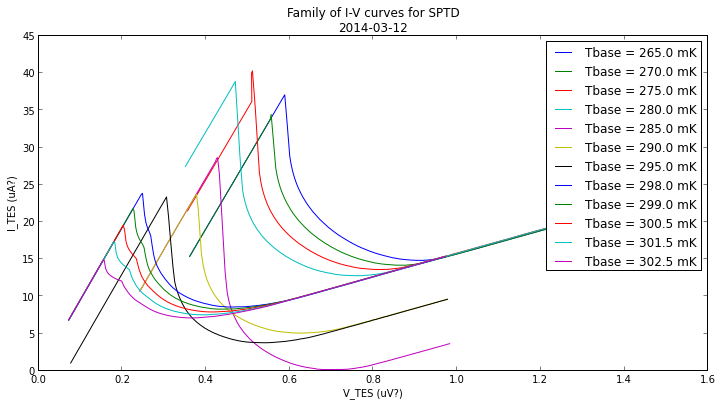

In [739]:
fig, ax = subplots(figsize=(12, 6))
reject = [.3065, .3055, .3045, .3035]

for i in range(len(Tbases)):
    Tbase = Tbases[i]
    if Tbase in reject: continue
    I = Is[i]
    V = Vs[i]
    label = 'Tbase = {0} mK'.format(Tbase*1.e3)
    ax.plot(V, I, label=label)
legend(loc='upper right')
xlabel('V_TES (uV?)')
ylabel('I_TES (uA?)')
title('Family of I-V curves for SPTD\n2014-03-12')

savefig('/Users/jlazear/data/SPTD_I-V.png', dpi=200)

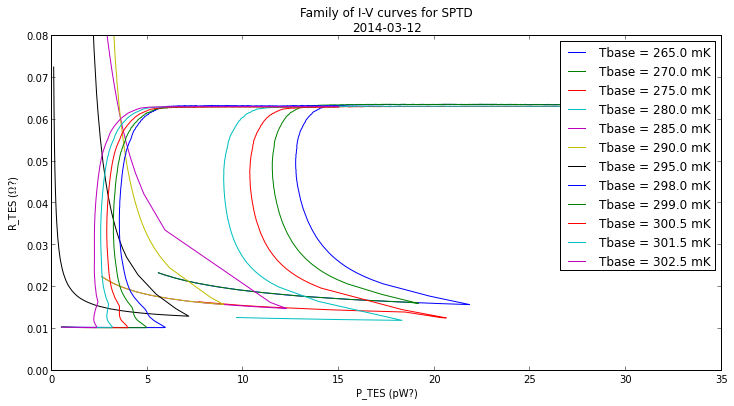

In [741]:
fig, ax = subplots(figsize=(12, 6))
rejectlist = [.3065, .3055, .3045, .3035]

for i in range(len(Tbases)):
    Tbase = Tbases[i]
    if Tbase in rejectlist: continue
    P = Ps[i]
    R = Rs[i]
    label = 'Tbase = {0} mK'.format(Tbase*1.e3)
    ax.plot(P, R, label=label)
legend(loc='upper right')
xlabel('P_TES (pW?)')
ylabel('R_TES ($\Omega$?)')
title('Family of I-V curves for SPTD\n2014-03-12')
ylim(0, .08)

savefig('/Users/jlazear/data/SPTD_R-P.png', dpi=200)

# Noise PSDs

In [745]:
## Utility functions ##
#---------------------#
def shortname(fname):
    newfname = os.path.basename(fname)
    newfname = newfname.rstrip('pwrspec')
    newfname = newfname.rstrip('.')
    return newfname

def reject(fnames, rejectlist = []):
    rlist = []
    for r in rejectlist:
        for i, name in enumerate(fnames):
            if r in name:
                rlist.append(name)
    
    rlist = list(set(rlist))
        
    for rname in rlist:
        fnames.pop(fnames.index(rname))
    
    return fnames

In [760]:
Rt = 100.  # FB Terminator = 100 Ohms
Rline = 143.5   # FB line resistance = 143.5 Ohms
V0 = 1.024   # 1.024 V is full range of DAC
RLFB = 1000.  # 1 kOhm FB load resistor
Nbits = 16   # 16 bit DAC
Rp = Rt*RLFB/(Rt + RLFB)   # Rterm || RLFB

F = Rp/(Rline + Rp)*V0/(RLFB*2**Nbits)
M = 17
print "F = {0} nA/code".format(F*1.e9)
print "M = {0}".format(M)

F = 6.05972464611 nA/code
M = 17


In [974]:
## Copy SWEEP/DATA datafile ##
#-----------------#
#cfg = 'floating'
cfg = 'grounded'
destname = 'Ch1-TES_I-V_recycled_Tbase-165mK'
#destname = 'S2-V-Phi_S2B-.5_recycled'

cfgstr = '_SHINY-shell-{0}_little-bat-floating'.format(cfg)
destext = '.txt'
origname = 'sweep.txt'
#origname = 'data.txt'

psquiddir = '/Users/jlazear/Documents/piper-repos/pic/hke/trunk/psquid/python/'
datadir = '/Users/jlazear/data/noise/20140318/'

orig = psquiddir + origname

destbase = '20140318_'
dest = datadir + destbase + destname + cfgstr + destext

!cp $orig $dest

In [1004]:
## Copy NOISE datafile ##
#-----------------#
#cfg = 'floating'
cfg = 'grounded'
destname = 'Ch1-TES_recycled_DETB-.300_normal-state'
stage = 4
pidparams = ['pos', 300, 10]
T = 0.165

tstr = '_{0}mK'.format(T*1.e3)
#cfgstr = '_SHINY-shell-{0}_little-bat-grounded'.format(cfg)
cfgstr = '_SHINY-shell-{0}_little-bat-floating'.format(cfg)
destext = '.txt'
origname = 'raw_data.txt'
#origname = 'sweep.txt'
#origname = 'data.txt'

psquiddir = '/Users/jlazear/Documents/piper-repos/pic/hke/trunk/psquid/python/'
datadir = '/Users/jlazear/data/noise/20140318/noise/'

orig = psquiddir + origname

destbase = '20140318_'
pidstr = '_i-{0}{1}:2^{2}'.format(*pidparams)
dest = datadir + destbase + destname + tstr + cfgstr + pidstr + destext

!cp $orig $dest

In [1005]:
## Generate spectra on all new datafiles ##
#-----------------------------------------#
basedir = '/Users/jlazear/data/noise/20140318/noise/'
txtarg = '*.txt'
pwrarg = '*.pwrspec'
txt = basedir + txtarg
pwr = basedir + pwrarg
fnamestxt = !ls $txt
fnamespwr = !ls $pwr

fnamestxt = [os.path.splitext(fname)[0] for fname in fnamestxt]
fnamespwr = [os.path.splitext(fname)[0] for fname in fnamespwr]
fnamestxt = set(fnamestxt)
fnamespwr = set(fnamespwr)

dfnames = fnamestxt - fnamespwr
fnames = [fname + '.txt' for fname in dfnames]

toddir = '/Users/jlazear/bitbucket/tod_power/'
todfile = 'tod_power.py' 
todpower = toddir + todfile

for fname in fnames:
    !python $todpower $fname

{'nbins': 150, 'plotfile': None, 'title': None, 'delta_t': 0.0001, 'read_method': 'read_psquid_adc', 'window': 'hanning', 'chunklen': 16, 'pwrfile': None, 'multiplier': None, 'units': None}
0%/Users/jlazear/bitbucket/tod_power/tod_power.py:76: RuntimeWarning: invalid value encountered in divide
  binned /= counts
98%
writing to /Users/jlazear/data/noise/20140318/noise/20140318_Ch1-TES_recycled_DETB-.400_normal-state_165.0mK_SHINY-shell-grounded_little-bat-floating_i-pos300:2^10.png /Users/jlazear/data/noise/20140318/noise/20140318_Ch1-TES_recycled_DETB-.400_normal-state_165.0mK_SHINY-shell-grounded_little-bat-floating_i-pos300:2^10.pwrspec


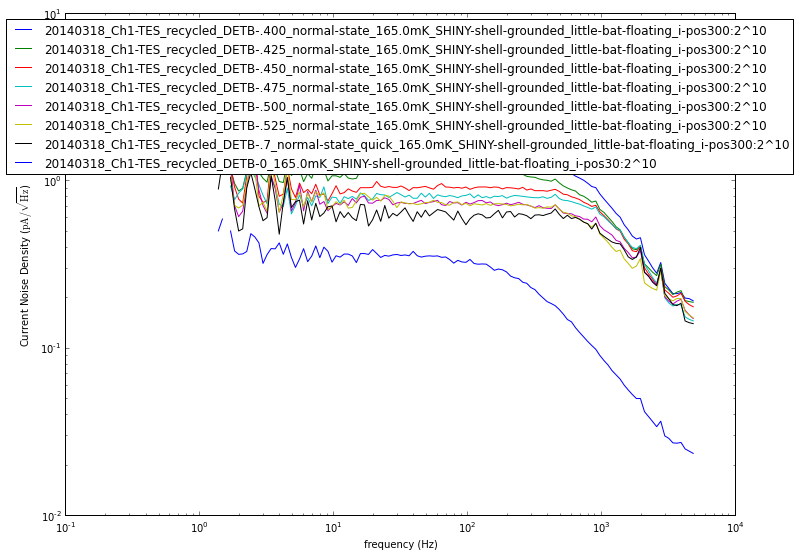

In [1006]:
## Plot all spectra ##
#--------------------#
conv = F/M*2**16/4.096   # S1 DAC -> TES arm current
#conv = 1.    # No conversion

basedir = '/Users/jlazear/data/noise/20140318/noise/'
pwrarg = '*.pwrspec'
pwr = basedir + pwrarg

fnames = !ls $pwr

rejectlist = [
              'all-unlocked', 
#              'all-unlocked_0', 
#              'all-unlocked_1', 
              'all-unlocked_base-spectrum', 
              'all_unlocked', 
              'S3-locked',
              'S2-locked',
              'S1-locked',
#              '165.0mK',
              'G-8',
              'Ch6',
              'Ch7',
              'pos100',
              'pos200',
#              'DETB-0',
              ]
fnames = reject(fnames, rejectlist)

fs = []
pwrs = []
stdpwrs = []
counts = []

for fname in fnames:
    d = np.loadtxt(fname)
    f, pwr, stdpwr, count = d.T
    fs.append(f)
    pwrs.append(pwr)
    stdpwrs.append(stdpwrs)
    counts.append(count)
    
fig, ax = subplots(figsize=(12,9))
for i in range(len(fnames)):
    fname = shortname(fnames[i])
    pwr = pwrs[i]*1.e12
    f = fs[i]
    ax.plot(f, pwr*conv, label=fname)

yscale('log')
xscale('log')
xlabel('frequency (Hz)')
ylabel('Current Noise Density ($\mathrm{pA/\sqrt{Hz}}$)')
#ax.legend(bbox_to_anchor=(1.2, 1.2))
ax.legend(loc='upper center')
savefig(basedir + '20140318_noise.png', dpi=200)

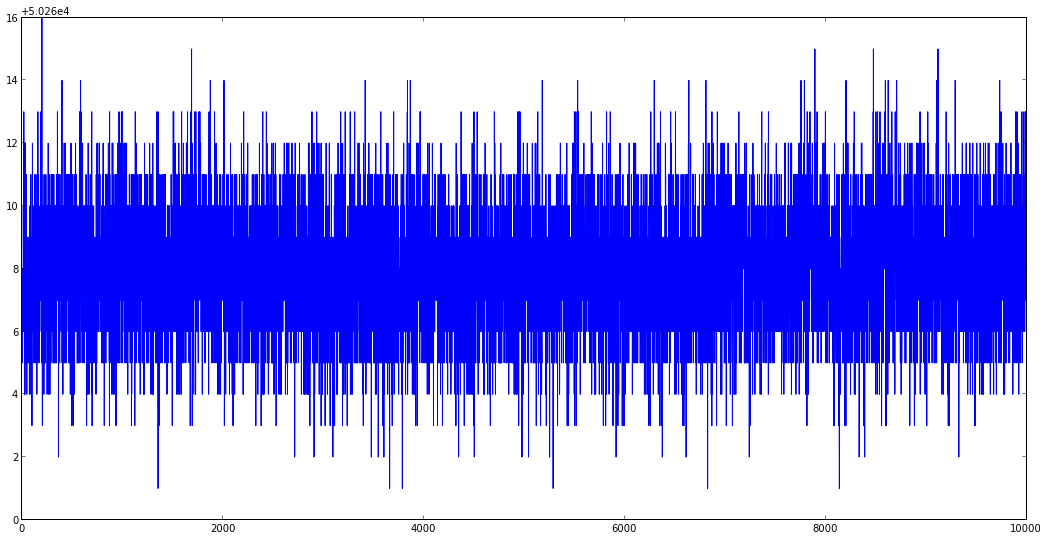

In [834]:
basedir = '/Users/jlazear/data/noise/20140318/noise/'
filename = '20140318_all-unlocked_0.0mK_SHINY-shell-grounded_little-bat-floating_i-neg0:2^0.txt'
f = basedir + filename

psrdr = PSRDR(f).init_data()

fig, ax = subplots(figsize=(18, 9))
ax.plot(psrdr['adc'][:10000])

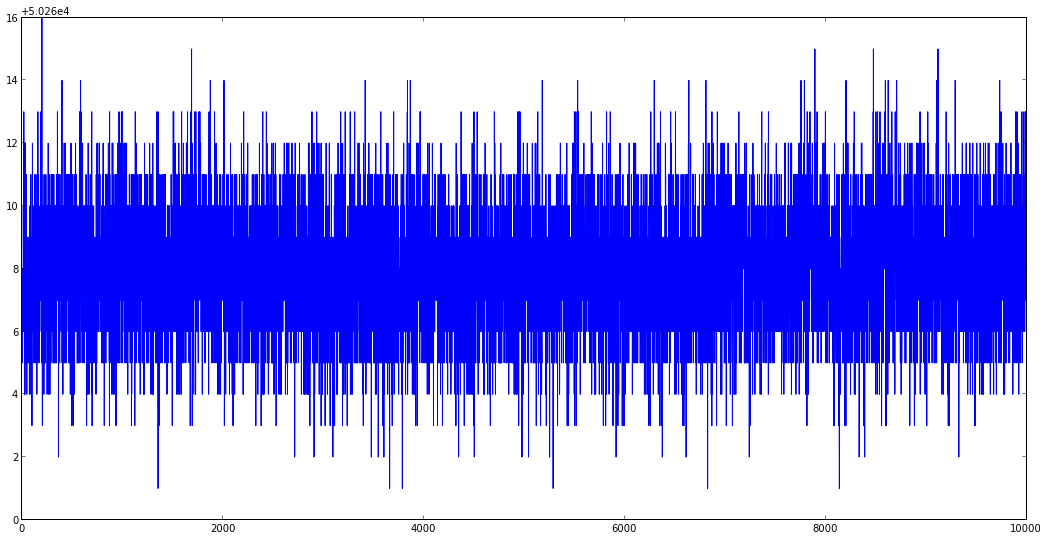

In [834]:
basedir = '/Users/jlazear/data/noise/20140318/noise/'
filename = '20140318_all-unlocked_0.0mK_SHINY-shell-grounded_little-bat-floating_i-neg0:2^0.txt'
f = basedir + filename

psrdr = PSRDR(f).init_data()

fig, ax = subplots(figsize=(18, 9))
ax.plot(psrdr['adc'][:10000])

# SQUID Parameters

In [11]:
from scipy.signal import argrelextrema
from scipy import stats

In [10]:
tuningdir = '/Users/jlazear/Documents/HDD Documents/Data/SHINY/140301 PIPER Proposal/data/tuning'
s1_v_phi = tuningdir + '/' + '20140311_S1_V-Phi_S2-locked-on-negative_S1-tuned.txt'
s1_v_phi
s1_v_phi_det_20 = tuningdir + '/' + '20140313_S1-V-Phi_from-detector-side_20mOhm.txt'
s1_v_phi_det_40 = tuningdir + '/' + '20140313_S1-V-Phi_from-detector-side_40mOhm.txt'

In [12]:
Rt = 100.  # FB Terminator = 100 Ohms
Rline = 143.5   # FB line resistance = 143.5 Ohms
V0 = 1.024   # 1.024 V is full range of DAC
RLFB = 1000.  # 1 kOhm FB load resistor
Nbits = 16   # 16 bit DAC
Rp = Rt*RLFB/(Rt + RLFB)   # Rterm || RLFB

F = Rp/(Rline + Rp)*V0/(RLFB*2**Nbits)
print "F = {0} nA/code".format(F*1.e9)

F = 6.05972464611 nA/code


In [13]:
s1_v_phi_data = PSSR(s1_v_phi).init_data()
s1data = s1_v_phi_data
s1_v_phi_det_data_40 = PSSR(s1_v_phi_det_40).init_data()
s1data2 = s1_v_phi_det_data_40
s1_v_phi_det_data_20 = PSSR(s1_v_phi_det_20).init_data()
s1data3 = s1_v_phi_det_data_20

./psquidpython/psquidreaders.py:377: FutureWarning: Numpy has detected that you (may be) writing to an array returned
by numpy.diagonal or by selecting multiple fields in a record
array. This code will likely break in the next numpy release --
see numpy.diagonal or arrays.indexing reference docs for details.
The quick fix is to make an explicit copy (e.g., do
arr.diagonal().copy() or arr[['f0','f1']].copy()).
  data[col] = data[col]/n


L_FB = d(I_FB)/d(Phi_0) = 83.3515125073 uA/Phi_0


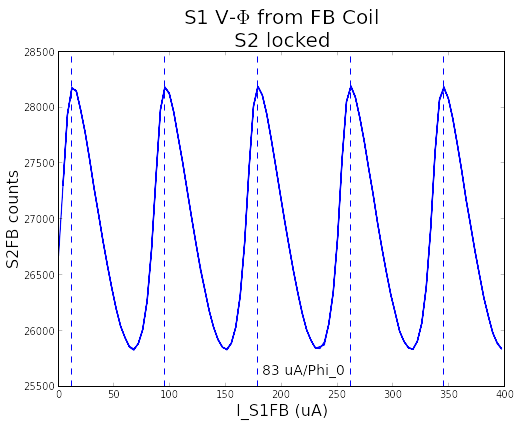

In [102]:
mydata = np.array(s1_v_phi_data['locked'])
localmaxes = argrelextrema(mydata, np.greater, order=5)[0]
dPhi0 = int(stats.mode(np.diff(localmaxes))[0][0])

dDfb = s1_v_phi_data['swept'][dPhi0] - s1_v_phi_data['swept'][0]

figure(figsize=(8, 6))
plot(s1data['swept']*F*1.e6, s1data['locked'], linewidth=1.5)
xlabel('I_S1FB (uA)', fontsize=16)
ylabel('S2FB counts', fontsize=16)
title('S1 V-$\Phi$ from FB Coil\nS2 locked', fontsize=20)
for index in localmaxes:
    axvline(s1data['swept'][index]*F*1.e6, ls='--')
annotate('83 uA/Phi_0', (183, 25600), fontsize=14)

    
dIfb_dPhi0 = dDfb*F
LFB = dIfb_dPhi0
print "L_FB = d(I_FB)/d(Phi_0) = {0} uA/Phi_0".format(LFB*1.e6)
savefig(basedir + 'S1FB_V_Phi.png', dpi=300)

F_det = 0.919981984458 nA/code
dPhi0_det =  124
dDdet = 8184.0
L_IN = d(I_IN)/d(Phi_0) = 7.52913256081 uA/Phi_0
M = L_FB/L_IN = 11.0705332698


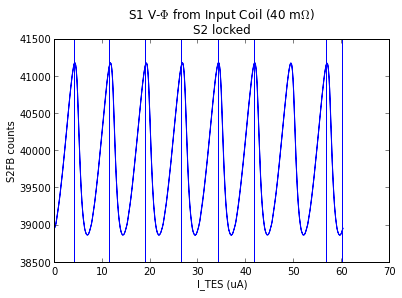

In [496]:
d = s1data2

Rsh = .85e-3  # .85 mOhm
RLDET = 200.  # 200 Ohms
RTES = 40.e-3  # 40 mOhms (hopefully)
Rp = RTES*Rsh/(RTES + Rsh)  # R_TES || R_sh
RlineDET = 153.4  # 153.4 Ohms
V0 = 1.024
Nbits = 16

Fdet = (Rp/(Rp + RLDET + RlineDET))*V0/RTES*1/(2**Nbits)
print "F_det = {0} nA/code".format(Fdet*1.e9)

mydata2 = np.array(d['locked'])
localmaxes2 = argrelextrema(mydata2, np.greater, order=5)[0]
dPhi0_det = int(stats.mode(diff(localmaxes2))[0][0])
print 'dPhi0_det = ', dPhi0_det

dDdet = d['swept'][dPhi0_det] - d['swept'][0]
print 'dDdet =', dDdet

#plot(s1data2['swept'], s1data2['locked'])
plot(d['swept']*Fdet*1.e6, d['locked'])
xlabel('I_TES (uA)')
ylabel('S2FB counts')
title('S1 V-$\Phi$ from Input Coil (40 m$\Omega$)\nS2 locked')
for index in localmaxes2:
    axvline(s1data2['swept'][index]*Fdet*1.e6)
#    axvline(s1data2['swept'][index])
    
dIdet_dPhi0 = dDdet*Fdet
LIN = dIdet_dPhi0
print "L_IN = d(I_IN)/d(Phi_0) = {0} uA/Phi_0".format(LIN*1.e6)
print "M = L_FB/L_IN = {0}".format(LFB/LIN)

dPhi0_det =  81
dDdet = 5346.0
L_IN = d(I_IN)/d(Phi_0) = 9.63594471641 uA/Phi_0
M = L_FB/L_IN = 8.65006130279


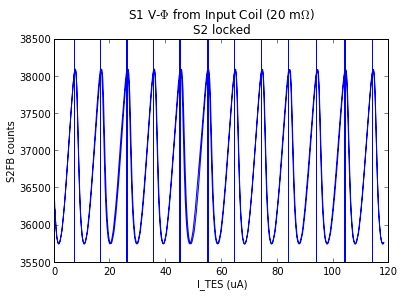

In [497]:
d = s1data3

Rsh = .85e-3  # .85 mOhm
RLDET = 200.  # 200 Ohms
R20 = 20.e-3  # 20 mOhms (hopefully)
Rp = R20*Rsh/(R20 + Rsh)  # R_TES || R_sh
RlineDET = 153.4  # 153.4 Ohms
V0 = 1.024
Nbits = 16

Fdet = (Rp/(Rp + RLDET + RlineDET))*V0/R20*1/(2**Nbits)

mydata2 = np.array(d['locked'])
localmaxes2 = argrelextrema(mydata2, np.greater, order=5)[0]
dPhi0_det = int(stats.mode(diff(localmaxes2))[0][0])
print 'dPhi0_det = ', dPhi0_det

dDdet = d['swept'][dPhi0_det] - d['swept'][0]
print 'dDdet =', dDdet

#plot(s1data2['swept'], s1data2['locked'])
plot(d['swept']*Fdet*1.e6, d['locked'])
xlabel('I_TES (uA)')
ylabel('S2FB counts')
title('S1 V-$\Phi$ from Input Coil (20 m$\Omega$)\nS2 locked')
for index in localmaxes2:
    axvline(d['swept'][index]*Fdet*1.e6)
#    axvline(s1data2['swept'][index])
    
dIdet_dPhi0 = dDdet*Fdet
LIN = dIdet_dPhi0
print "L_IN = d(I_IN)/d(Phi_0) = {0} uA/Phi_0".format(LIN*1.e6)
print "M = L_FB/L_IN = {0}".format(LFB/LIN)

# Parasitic Resistance Fit

In [427]:
cd /Users/jlazear/data/tuning

/Users/jlazear/data/tuning


In [29]:
basedir = '/Users/jlazear/Documents/HDD Documents/Data/SHINY/140301 PIPER Proposal/data/tuning/'

fname40 = '20140311_Ch6-I-V_S1-locked_high-bandwidth.txt'
fname20 = '20140311_Ch7-I-V_S1-locked_high-bandwidth.txt'

data40 = PSSR(basedir + fname40).init_data()
data20 = PSSR(basedir + fname20).init_data()

slope = 1.692


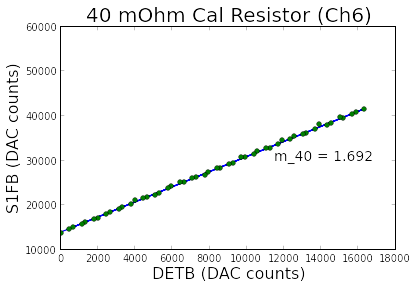

In [81]:
d = data40
m40, b40 = np.polyfit(d['swept'], d['locked'], 1)
plot(d['swept'][::10], d['swept'][::10]*m40 + b40, '-', linewidth=1.5)
plot(d['swept'][::10], d['locked'][::10], 'o', markersize=5)

xlim((0, 18000))
ylim((10000, 60000))
xlabel('DETB (DAC counts)', fontsize=16)
ylabel('S1FB (DAC counts)', fontsize=16)
title('40 mOhm Cal Resistor (Ch6)', fontsize=20)
annotate('m_40 = {0}'.format(str(m40)[:5]), (11500, 30000), fontsize=14)

print "slope = {0}".format(str(m40)[:5])
savefig(basedir + 'm40.png', dpi=300)

slope = 2.718


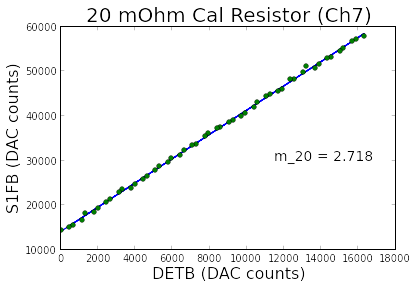

In [82]:
d = data20
m20, b20 = np.polyfit(d['swept'], d['locked'], 1)
plot(d['swept'][::10], d['swept'][::10]*m20 + b20, '-', linewidth=1.5)
plot(d['swept'][::10], d['locked'][::10], 'o', markersize=5)


xlim((0, 18000))
ylim((10000, 60000))
xlabel('DETB (DAC counts)', fontsize=16)
ylabel('S1FB (DAC counts)', fontsize=16)
title('20 mOhm Cal Resistor (Ch7)', fontsize=20)
annotate('m_20 = {0}'.format(str(m20)[:5]), (11500, 30000), fontsize=14)

print "slope = {0}".format(str(m20)[:5])
savefig(basedir + 'm20.png', dpi=300)

slope = 2.71829223633


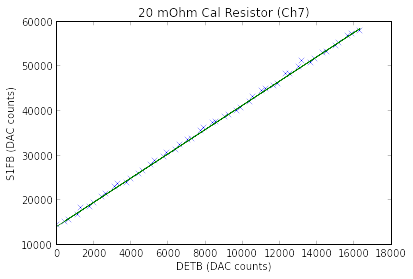

In [31]:
d = data20
plot(d['swept'][::10], d['locked'][::10], 'x')
m20, b20 = np.polyfit(d['swept'], d['locked'], 1)
plot(d['swept'][::10], d['swept'][::10]*m20 + b20)

xlabel('DETB (DAC counts)')
ylabel('S1FB (DAC counts)')
title('20 mOhm Cal Resistor (Ch7)')

print "slope = {0}".format(m20)

Model the cal resistors as:
$m \propto \frac{1}{R(1 + x)}$

Note that the gold bond pad length between the wirebonds is approximately equal for both the 20 mOhm and 40 mOhm channels, so we will fit to a single parasitic resistance with no scaling between channels. So we will choose the parasitic scaling factor $x$ to be relative to $R_{20}$, so 

$m_{20} \propto \frac{1}{R_{20}(1 + x)}$

or

$R_p = xR_{20} = \frac{x}{2}R_{40}$

so

$m_{40} \propto \frac{1}{R_{40}(1 + x/2)}$

Assuming the resistors are good calibration resistors, then

$\frac{R_{20}}{R_{40}} = \frac{1}{2} = \frac{m_{40} (1 + x/2)}{m_{20}(1 + x)}$

Solving for $x$,

$x = \frac{2(m_{40}/m_{20}) - 1}{1 - (m_{40}/m_{20})}$

In [84]:
M = m20/m40
R40 = 0.04
R20 = 0.02
print M, R40*(1. - M/2.)/(M - 1.) * 1.e3

1.60609 12.9982595348


In [449]:
x = (2*m40/m20 - 1)/(1 - m40/m20)
Rp = x*.02  # Ohms
print "R_p = {0} mOhms".format(Rp*1.e3)

R_p = 12.9982635645 mOhms


# Correcting M using estimated R_parasitic

dPhi0_det =  124
dDdet = 8184.0
L_IN = d(I_IN)/d(Phi_0) = 5.7115146034 uA/Phi_0
M = L_FB/L_IN = 14.5935917695


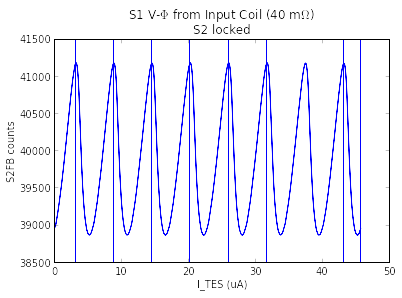

In [105]:
d = s1data2

R_p = 13.e-3  # 13 mOhm

Rsh = .85e-3  # .85 mOhm
RLDET = 200.  # 200 Ohms
RTES = 40.e-3 + R_p  # 40 mOhms (hopefully)
Rp = RTES*Rsh/(RTES + Rsh)  # R_TES || R_sh
RlineDET = 153.4  # 153.4 Ohms
V0 = 1.024
Nbits = 16

Fdet = (Rp/(Rp + RLDET + RlineDET))*V0/RTES*1/(2**Nbits)

mydata2 = np.array(d['locked'])
localmaxes2 = argrelextrema(mydata2, np.greater, order=5)[0]
dPhi0_det = int(stats.mode(diff(localmaxes2))[0][0])
print 'dPhi0_det = ', dPhi0_det

dDdet = d['swept'][dPhi0_det] - d['swept'][0]
print 'dDdet =', dDdet

#plot(s1data2['swept'], s1data2['locked'])
plot(d['swept']*Fdet*1.e6, d['locked'])
xlabel('I_TES (uA)')
ylabel('S2FB counts')
title('S1 V-$\Phi$ from Input Coil (40 m$\Omega$)\nS2 locked')
for index in localmaxes2:
    axvline(s1data2['swept'][index]*Fdet*1.e6)
#    axvline(s1data2['swept'][index])
    
dIdet_dPhi0 = dDdet*Fdet
LIN = dIdet_dPhi0
print "L_IN = d(I_IN)/d(Phi_0) = {0} uA/Phi_0".format(LIN*1.e6)
print "M = L_FB/L_IN = {0}".format(LFB/LIN)

dPhi0_det =  81
dDdet = 5346.0
L_IN = d(I_IN)/d(Phi_0) = 5.93528625617 uA/Phi_0
M = L_FB/L_IN = 14.0433854257


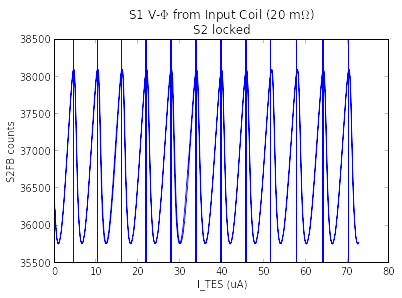

In [106]:
d = s1data3

R_p = 13.e-3  # 13 mOhm

Rsh = .85e-3  # .85 mOhm
RLDET = 200.  # 200 Ohms
R20 = 20.e-3 + R_p  # 20 mOhms (hopefully)
Rp = R20*Rsh/(R20 + Rsh)  # R_TES || R_sh
RlineDET = 153.4  # 153.4 Ohms
V0 = 1.024
Nbits = 16

Fdet = (Rp/(Rp + RLDET + RlineDET))*V0/R20*1/(2**Nbits)

mydata2 = np.array(d['locked'])
localmaxes2 = argrelextrema(mydata2, np.greater, order=5)[0]
dPhi0_det = int(stats.mode(diff(localmaxes2))[0][0])
print 'dPhi0_det = ', dPhi0_det

dDdet = d['swept'][dPhi0_det] - d['swept'][0]
print 'dDdet =', dDdet

#plot(s1data2['swept'], s1data2['locked'])
plot(d['swept']*Fdet*1.e6, d['locked'])
xlabel('I_TES (uA)')
ylabel('S2FB counts')
title('S1 V-$\Phi$ from Input Coil (20 m$\Omega$)\nS2 locked')
for index in localmaxes2:
    axvline(d['swept'][index]*Fdet*1.e6)
#    axvline(s1data2['swept'][index])
    
dIdet_dPhi0 = dDdet*Fdet
LIN = dIdet_dPhi0
print "L_IN = d(I_IN)/d(Phi_0) = {0} uA/Phi_0".format(LIN*1.e6)
print "M = L_FB/L_IN = {0}".format(LFB/LIN)

In [151]:
s1data2['swept'][localmaxes2]*Fdet2*1.e6

68       3.132121
191      8.797575
315     14.509089
564     25.978180
688     31.689695
937     43.158783
993     45.692120
1048    43.158783
1297    31.689695
1546    20.220604
1670    14.509089
1794     8.797575
1917     3.132121
Name: swept, dtype: float32

L_FB = d(I_FB)/d(Phi_0) = 83.3515125073 uA/Phi_0
dPhi0_det20 =  81
dDdet20 = 5346.0
dPhi0_det40 =  124
dDdet40 = 8184.0
L_IN (20 mOhm) = d(I_IN)/d(Phi_0) = 5.93528625617 uA/Phi_0
M (20 mOhm) = L_FB/L_IN = 14.0433854257
L_IN (40 mOhm) = d(I_IN)/d(Phi_0) = 5.7115146034 uA/Phi_0
M (40 mOhm) = L_FB/L_IN = 14.5935917695


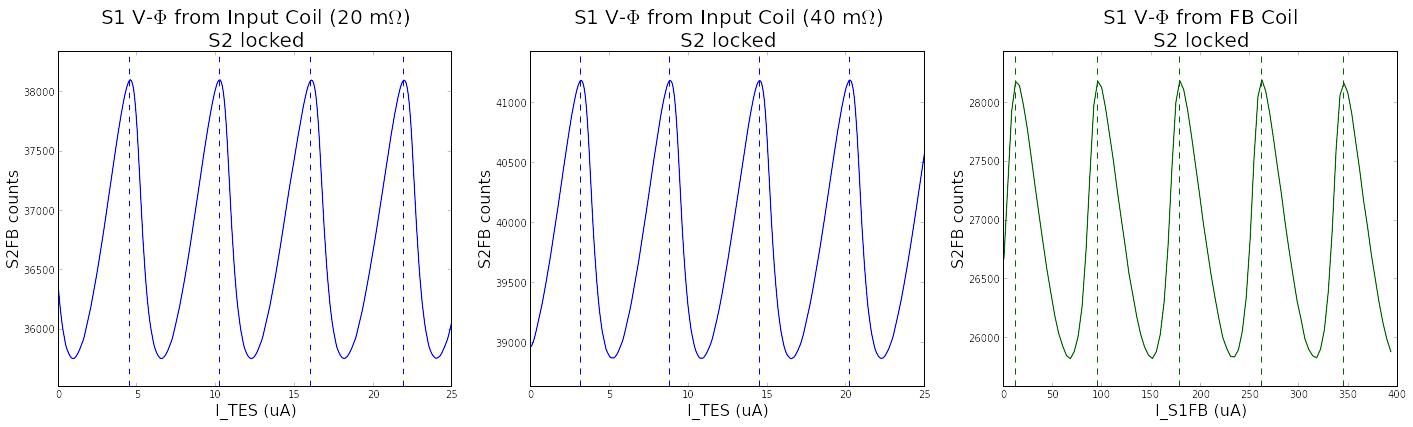

In [188]:
fig, axes = subplots(nrows=1, ncols=3, figsize=(24, 6))
ax0, ax1, ax2 = axes

mydata = np.array(s1_v_phi_data['locked'])
localmaxes = argrelextrema(mydata, np.greater, order=5)[0]
dPhi0 = int(stats.mode(np.diff(localmaxes))[0][0])

dDfb = s1_v_phi_data['swept'][dPhi0] - s1_v_phi_data['swept'][0]

# figure(figsize=(8, 6))
L0 = len(s1data['locked'])
ax2.plot((s1data['swept']*F*1.e6)[:L0/2], s1data['locked'][:L0/2], 'darkgreen', linewidth=1.5)
ax2.set_xlabel('I_S1FB (uA)', fontsize=16)
ax2.set_ylabel('S2FB counts', fontsize=16)
ax2.set_title('S1 V-$\Phi$ from FB Coil\nS2 locked', fontsize=20)
for index in localmaxes:
    ax2.axvline(s1data['swept'][index]*F*1.e6, ls='--', c='darkgreen')
# annotate('83 uA/Phi_0', (183, 25600), fontsize=14)

    
dIfb_dPhi0 = dDfb*F
LFB = dIfb_dPhi0
print "L_FB = d(I_FB)/d(Phi_0) = {0} uA/Phi_0".format(LFB*1.e6)
# savefig(basedir + 'S1FB_V_Phi.png', dpi=300)


d3 = s1data3

R_p = 13.e-3  # 13 mOhm

Rsh = .85e-3  # .85 mOhm
RLDET = 200.  # 200 Ohms
R20 = 20.e-3 + R_p  # 20 mOhms (hopefully)
Rp = R20*Rsh/(R20 + Rsh)  # R_TES || R_sh
RlineDET = 153.4  # 153.4 Ohms
V0 = 1.024
Nbits = 16

Fdet3 = (Rp/(Rp + RLDET + RlineDET))*V0/R20*1/(2**Nbits)

mydata3 = np.array(d3['locked'])
localmaxes3 = argrelextrema(mydata3, np.greater, order=5)[0]
dPhi0_det3 = int(stats.mode(diff(localmaxes3))[0][0])
print 'dPhi0_det20 = ', dPhi0_det3

dDdet3 = d3['swept'][dPhi0_det3] - d3['swept'][0]
print 'dDdet20 =', dDdet3

#plot(s1data2['swept'], s1data2['locked'])
L3 = len(d3['locked'])
ax0.plot((d3['swept']*Fdet*1.e6)[:L3/2], d3['locked'][:L3/2], linewidth=1.5)
ax0.set_xlabel('I_TES (uA)', fontsize=16)
ax0.set_ylabel('S2FB counts', fontsize=16)
ax0.set_title('S1 V-$\Phi$ from Input Coil (20 m$\Omega$)\nS2 locked', fontsize=20)
localmaxes3 = sort(localmaxes3)
for index in localmaxes3[:-10]:
    ax0.axvline(d3['swept'][index]*Fdet3*1.e6, ls='--')
#    axvline(s1data2['swept'][index])

d2 = s1data2

R_p = 13.e-3  # 13 mOhm

Rsh = .85e-3  # .85 mOhm
RLDET = 200.  # 200 Ohms
R40 = 40.e-3 + R_p  # 40 mOhms (hopefully)
Rp = R40*Rsh/(R40 + Rsh)  # R_TES || R_sh
RlineDET = 153.4  # 153.4 Ohms
V0 = 1.024
Nbits = 16

Fdet2 = (Rp/(Rp + RLDET + RlineDET))*V0/R40*1/(2**Nbits)

mydata2 = np.array(d2['locked'])
localmaxes2 = argrelextrema(mydata2, np.greater, order=5)[0]
dPhi0_det2 = int(stats.mode(diff(localmaxes2))[0][0])
print 'dPhi0_det40 = ', dPhi0_det2

dDdet2 = d2['swept'][dPhi0_det2] - d2['swept'][0]
print 'dDdet40 =', dDdet2

#plot(s1data2['swept'], s1data2['locked'])
L2 = len(d2['locked'])
ax1.plot((d2['swept']*Fdet2*1.e6)[:L2/2], d2['locked'][:L2/2], linewidth=1.5)
ax1.set_xlabel('I_TES (uA)', fontsize=16)
ax1.set_ylabel('S2FB counts', fontsize=16)
ax1.set_title('S1 V-$\Phi$ from Input Coil (40 m$\Omega$)\nS2 locked', fontsize=20)

# for xval in (s1data2['swept'][localmaxes2]*Fdet2*1.e6)[:7]:
#     ax1.axvline(xval, ls='--')
for index in localmaxes2:
    val = s1data2['swept'][index]*Fdet2*1.e6
    if val <45.:
        ax1.axvline(val, ls='--')
#    axvline(s1data2['swept'][index])
ax1.axvline(37.475, ls='--')

ax0.set_xlim((0, 25))
ax1.set_xlim((0, 25))
min0, max0 = min(d3['locked']), max(d3['locked'])
min1, max1 = min(d2['locked']), max(d2['locked'])
min2, max2 = min(s1data['locked']), max(s1data['locked'])
med0 = 0.5*(min0 + max0)
delta0 = 0.5*(max0 - min0)
med1 = 0.5*(min1 + max1)
delta1 = 0.5*(max1 - min1)
med2 = 0.5*(min2 + max2)
delta2 = 0.5*(max2 - min2)

ax0.set_ylim((med0 - 1.2*delta0, med0 + 1.2*delta0))
ax1.set_ylim((med1 - 1.2*delta1, med1 + 1.2*delta1))
ax2.set_ylim((med2 - 1.2*delta2, med2 + 1.2*delta2))

dIdet_dPhi03 = dDdet3*Fdet3
LIN3 = dIdet_dPhi03
print "L_IN (20 mOhm) = d(I_IN)/d(Phi_0) = {0} uA/Phi_0".format(LIN3*1.e6)
print "M (20 mOhm) = L_FB/L_IN = {0}".format(LFB/LIN3)

dIdet_dPhi02 = dDdet2*Fdet2
LIN2 = dIdet_dPhi02
print "L_IN (40 mOhm) = d(I_IN)/d(Phi_0) = {0} uA/Phi_0".format(LIN2*1.e6)
print "M (40 mOhm) = L_FB/L_IN = {0}".format(LFB/LIN2)

fig.savefig(basedir + 'S1_V_Phi.png', dpi=300, bbox_inches='tight')

In [455]:
sqrt(2.833**2 + 162.333**2)
print sqrt(47.083**2 + 1.208**2) + 48.333

95.4314941691


In [457]:
S_TES = 95.4*(68.25/162.36)
S_TES*13./50.

10.426662971175167

In [500]:
ivscript = '/Users/jlazear/bitbucket/piper_mce_script/python/iv_analysis_labtest.py'
cfgfile = '/Users/jlazear/bitbucket/piper_mce_script/template/shiny.cfg'
basedir = '/Users/jlazear/data/tuning/'
fname6 = '20140311_Ch6-I-V_S1-locked_high-bandwidth.txt'
fname7 = '20140311_Ch7-I-V_S1-locked_high-bandwidth.txt'
fnames = [basedir + fname6, basedir + fname7]
for fname in fnames:
    !python $ivscript $fname $cfgfile

Failed to load PDF collation libraries.
/Users/jlazear/bitbucket/piper_mce_script/python/psquidreaders.py:377: FutureWarning: Numpy has detected that you (may be) writing to an array returned
by numpy.diagonal or by selecting multiple fields in a record
array. This code will likely break in the next numpy release --
see numpy.diagonal or arrays.indexing reference docs for details.
The quick fix is to make an explicit copy (e.g., do
arr.diagonal().copy() or arr[['f0','f1']].copy()).
  data[col] = data[col]/n
loading hdf5 IV file
[[ 0.03045345]]
(1, 1, 248)
Failed to load PDF collation libraries.
/Users/jlazear/bitbucket/piper_mce_script/python/psquidreaders.py:377: FutureWarning: Numpy has detected that you (may be) writing to an array returned
by numpy.diagonal or by selecting multiple fields in a record
array. This code will likely break in the next numpy release --
see numpy.diagonal or arrays.indexing reference docs for details.
The quick fix is to make an explicit copy (e.g., do
ar

In [501]:
ivoutfiles = !ls ~/data/tuning/*.ivout

Is = []
Vs = []
Ps = []
Rs = []
for fname in ivoutfiles:
    I, V, P = np.loadtxt(fname).T
    R = V/I
    Is.append(I)
    Vs.append(V)
    Ps.append(P)   
    Rs.append(R)

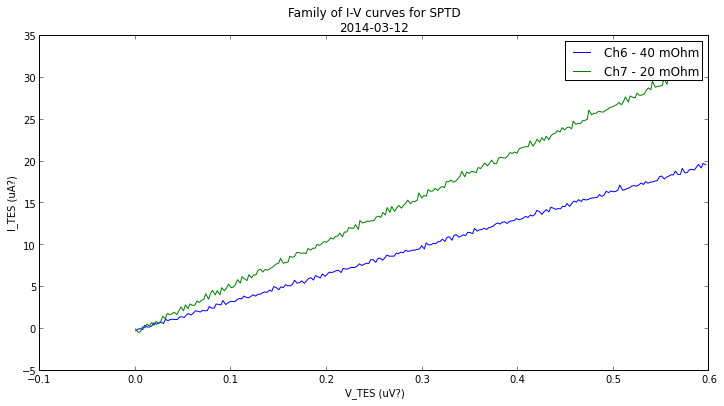

In [502]:
Tbases = ['Ch6 - 40 mOhm', 'Ch7 - 20 mOhm']
fig, ax = subplots(figsize=(12, 6))
reject = [.3065, .3055, .3045, .3035]

for i in range(len(Tbases)):
    Tbase = Tbases[i]
    if Tbase in reject: continue
    I = Is[i]
    V = Vs[i]
    label = '{0}'.format(Tbase)
    ax.plot(V, I, label=label)
legend(loc='upper right')
xlabel('V_TES (uV?)')
ylabel('I_TES (uA?)')
title('Family of I-V curves for SPTD\n2014-03-12')

#savefig('/Users/jlazear/data/SPTD_I-V.png', dpi=200)

(0, 0.05)

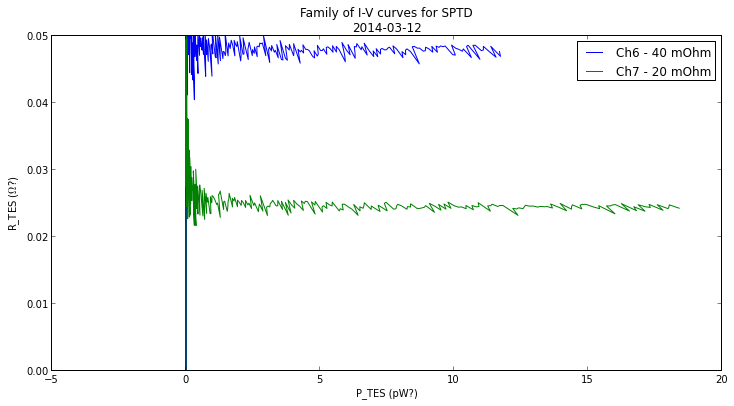

In [504]:
fig, ax = subplots(figsize=(12, 6))
reject = []

for i in range(len(Tbases)):
    Tbase = Tbases[i]
    if Tbase in reject: continue
    P = Ps[i]
    R = 2*Rs[i] - .013
    label = '{0}'.format(Tbase)
    ax.plot(P, R, label=label)
legend(loc='upper right')
xlabel('P_TES (pW?)')
ylabel('R_TES ($\Omega$?)')
title('Family of I-V curves for SPTD\n2014-03-12')
ylim(0, .05)

#savefig('/Users/jlazear/data/SPTD_R-P.png', dpi=200)

# Misc

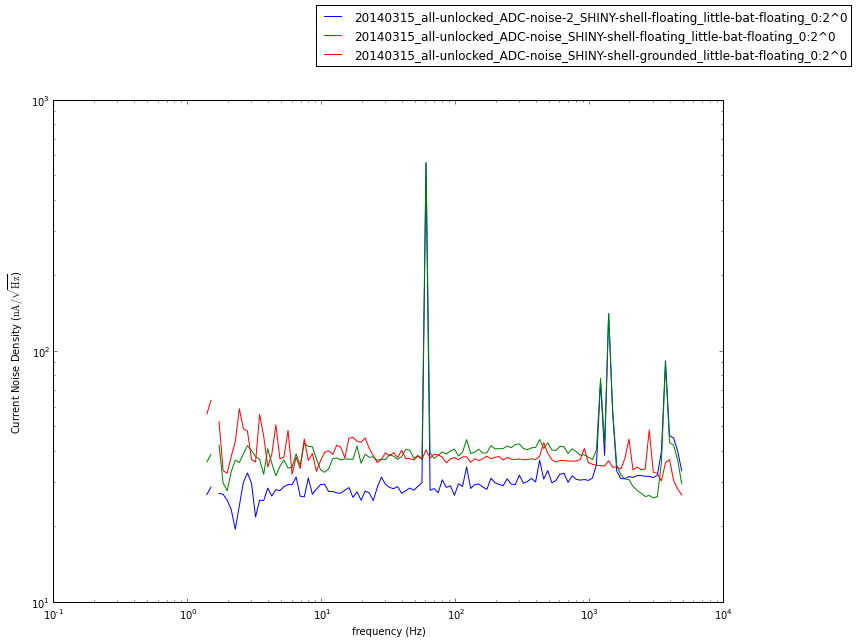

In [825]:
## Plot all spectra ##
#--------------------#
#conv = F/M   # S1 DAC -> TES arm current
conv = 1.    # No conversion

basedir = '/Users/jlazear/data/noise/20140315-tuning/noise/'
pwrarg = '*.pwrspec'
pwr = basedir + pwrarg

fnames = !ls $pwr

rejectlist = [
#              'all-unlocked', 
              'all-unlocked_base-spectrum', 
              'all_unlocked', 
              'S3-locked',
              'S2-locked',
#              'S1-locked',
#              'shell-floating',
#              'shell-grounded',
              'ADR-line-connnected',
              'ADR-line-filtered',
              'connected-but-no-current',
              'HKE-power',
              'recycled_2',
#              'neg1',
              'S2-locked_SHINY',
#              'pos10',
#              'pos20',
              'quick',
              'Ch6',
              'TES',
              ]
fnames = reject(fnames, rejectlist)

fs = []
pwrs = []
stdpwrs = []
counts = []

for fname in fnames:
    d = np.loadtxt(fname)
    f, pwr, stdpwr, count = d.T
    fs.append(f)
    pwrs.append(pwr)
    stdpwrs.append(stdpwrs)
    counts.append(count)
    
fig, ax = subplots(figsize=(12,9))
for i in range(len(fnames)):
    fname = shortname(fnames[i])
    pwr = pwrs[i]*1.e9
    f = fs[i]
    ax.plot(f, pwr, label=fname)

yscale('log')
xscale('log')
xlabel('frequency (Hz)')
ylabel('Current Noise Density ($\mathrm{nA/\sqrt{Hz}}$)')
ax.legend(bbox_to_anchor=(1.2, 1.2))
#ax.legend(loc='upper center')
#savefig(basedir + '20140315_TES+40mOhm-Johnson_noise.png', dpi=200)

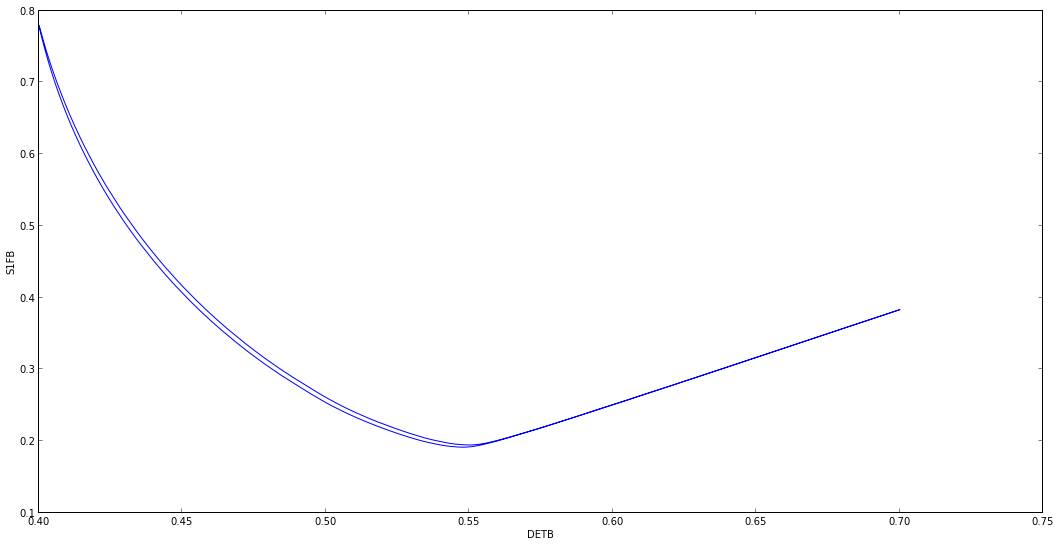

In [985]:
basedir = '/Users/jlazear/data/noise/20140318/'
filename = '20140318_Ch1-TES_I-V_recycled_Tbase-165mK_SHINY-shell-grounded_little-bat-floating.txt'
f = basedir + filename

pssr = PSSR(f).init_data()

fig, ax = subplots(figsize=(18, 9))
pssr
ax.plot(pssr['swept']/65535, pssr['locked']/65535.)
ax.set_xlabel('DETB')
ax.set_ylabel('S1FB')
#xlim(.4, .55)

In [931]:
vphis67datas

[<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 1984
Data columns (total 3 columns):
swept     1985  non-null values
locked    1985  non-null values
adc       1985  non-null values
dtypes: float32(3),
 <class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 1984
Data columns (total 3 columns):
swept     1985  non-null values
locked    1985  non-null values
adc       1985  non-null values
dtypes: float32(3)]

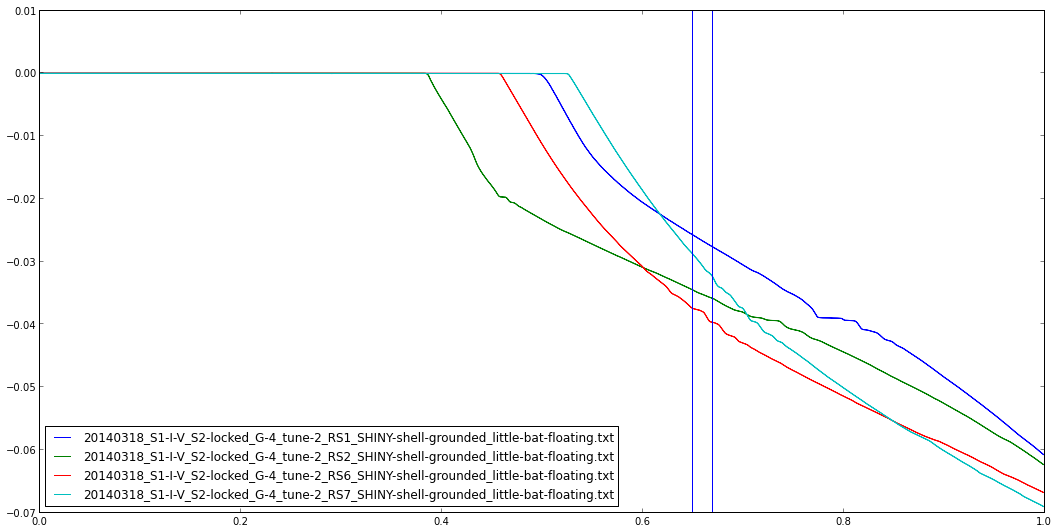

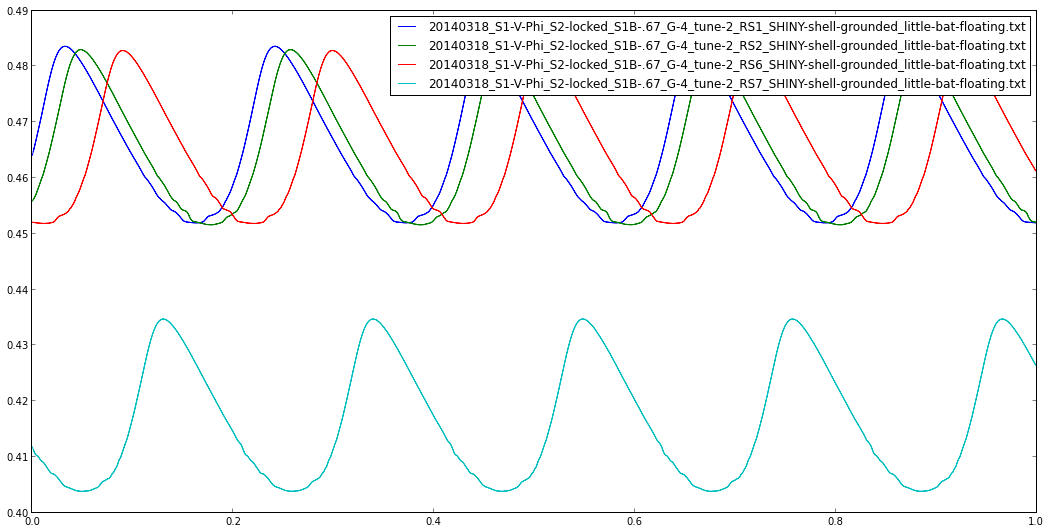

In [932]:
basedir = '/Users/jlazear/data/noise/20140318/'
arg = '*I-V*RS*'
arg2 = '*V-Phi*.67*RS*'
arg3 = '*V-Phi*.65*RS*'

argstr = basedir + arg
argstr2 = basedir + arg2
argstr3 = basedir + arg3

ivfnames = !ls $argstr
vphis67fnames = !ls $argstr2
vphis65fnames = !ls $argstr3

ivdatas = [PSSR(fname).init_data() for fname in ivfnames]
vphis67datas = [PSSR(fname).init_data() for fname in vphis67fnames]
vphis65datas = [PSSR(fname).init_data() for fname in vphis65fnames]

fig, ax = subplots(figsize=(18, 9))
for i in range(len(ivdatas)):
    d = ivdatas[i]
    offset = average(d['locked'][d['swept'] < .25])
    
    fname = ivfnames[i]
    label = os.path.basename(fname)
    ax.plot(d['swept']/65535, (d['locked'] - offset)/65535., label=label)

ax.axvline(.65)
ax.axvline(.67)
ax.legend(loc='lower left')


fig2, ax2 = subplots(figsize=(18, 9))
for i in range(len(vphis67datas)):
    d = vphis67datas[i]
    fname = vphis67fnames[i]
    label = os.path.basename(fname)
    ax2.plot(d['swept']/65535, (d['locked'])/65535., label=label)
ax2.legend()

In [945]:
conv

3.5645439094776944e-10

In [919]:
os.path.basename(ivfnames[0])

'20140318_S1-I-V_S2-locked_G-4_tune-2_RS1_SHINY-shell-grounded_little-bat-floating.txt'